In [1]:
import re
import pandas as pd
from collections import defaultdict
import matplotlib.pyplot as plt

In [ ]:
# Sample false positives load from txt file where separated by newline
with open("scripts/output/false_positives.txt", "r") as file:
    fp_list = file.read().splitlines()
    false_positives = [eval(val)[0] for val in fp_list]
false_positives

['gse138474',
 'gse149180',
 'gse193959',
 '41380_2022_1926_moesm2_esm.xlsx',
 'mayornaseq',
 '41380_2022_1926_moesm1_esm.pdf',
 'phs000424.v7.p2',
 'phs001301.v1.p1',
 '10.5281/zenodo.5543734',
 'phs003208.v1.p1',
 '10.5281/zenodo.7562405',
 'nct00483561',
 '10.5281/zenodo.7405971',
 'aanderson54/scmultiomics_ad',
 'gse214637',
 'gpl84',
 'gse10281',
 'gpl570',
 'gse11352',
 'e-geod-33245',
 'srp012656',
 'gse217196',
 'gse164466',
 'tcga',
 '10.5281/zenodo.292986',
 'gse108003',
 'phs001657.v1.p1',
 'gse147528',
 'tcga',
 'mc3-2017',
 'tcgaa',
 'gnomad',
 'publication_hotspots.vcf',
 'pancanatlas-germline-awg',
 'homo_sapiens.grch37.87.gff3.gz',
 'e-mtab-6363',
 'gse218776',
 'cortexcelldeconv',
 '10.5281/zenodo.8274879',
 'gse199241',
 'gdsc',
 'gse21257',
 '1418_hbcc_genetic_variables_10_26_22.xlsx',
 '3151',
 'phs000979.v3.p2',
 '10.17632/67yzwc826b.2',
 'gse79404',
 'gse104381',
 'gse29016',
 'tcga',
 'gse131928',
 'gse227721',
 'cgga',
 'gse89567',
 'tcga',
 'media-2.zip',
 'med

In [9]:
 # Define regex patterns for repositories
repo_patterns = {
    'PRIDE': r'^pxd\d{6}$|^pdx\d{6}$',
    'MassIVE': r'^msv\d+$|^msv\d{6}$|^mz\d+$',
    'GEO': r'^gse\d+$',
    'GSM': '^gsm\d+$',
    'GPL': '^gpl\d+$',
    'EGA': r'^egad\d+$|^egas\d+$|^ega-box-\d+',
    'dbGaP': r'^phs\d+',
    'BioSample': r'^samn\d+$',
    'BioProject': r'^prjna\d+$|^prjeb\d+$|^prjdb\d+$|^prjda\d+$|^pr\d+$',
    'SRA': r'^srp\d+$|^srr\d+$|^srx\d+$|^sra\d+$|^dr[a-z]\d+$|^erp\d+$',
    'ENA': r'^ers\d+$|^erp\d+$|^era\d+$',
    'JPOST': r'^jpst\d+$|^jpost:jpst\d+$',
    'PDB': r'^(pdb\s*[:\-]?\s*)?\w{4}$|^pdbdev_\d{9}$',
    'EMDB': r'^emd[-_]?\d+$|^empiar[-_]?\d+$',
    'IPROX': r'^ipx\d+$|^ipx\d{10}$',
    'MetaboLights': r'^mtbls\d+$|^st\d+$',
    'Metabolomics Workbench': r'^st\d+$|^metabolomics workbench',
    'ArrayExpress': r'^e-\w+-\d+$',
    'Human Cell Atlas': r'^hra\d+$',
    'NBDC Japan': r'^jd\d+$|^jga\d+$',
    'NIHMS': r'^nihms\d+$',
    'PMC': r'^pmc\d+$',
    'PubMed': r'^\d{7,9}$',
    'BMRB': r'^bmrb\s*\d+$',
    'EMPIAR': r'^empiar[-_]?\d+$',
    'Cell Image Library': r'^c[0-9a-z]{6,}$',
    'Zenodo': r'zenodo|10\.5281/zenodo\.\d+',
    'Dryad': r'dryad|10\.\d+/dryad\.\w+',
    'Figshare': r'figshare|10\.\d{4,9}/figshare\.\d+',
    'GitHub': r'^https?://github\.com/',
    'Salk Institute': r'^salk_\d+$',
    'ENCODE': r'^wgencode.*|^encitp.*',
    'Gene Expression Omnibus': r'^gsm\d+$|^gse\d+$',
    'Genome Data Viewer': r'^cp\d+',
    'ClinVar': r'^scv\d+$',
    'GVM': r'^gvm\d+$',
    'OSU Repository': r'^osu-',
    'DDBJ': r'^dra\d+$',
    'JGA Japan': r'^jga\d+$',
    'EV-Repo': r'^ev\d+',
    'Synapse': r'^syn\d{7,12}$',
}

# Classify false positives and count frequencies
repo_counts = defaultdict(int)

for fp in false_positives:
    classified = False
    #print(f"FP: {fp}") if '10.' in fp else None
    for repo, pattern in repo_patterns.items():
        if re.match(pattern, fp, re.IGNORECASE):
            repo_counts[repo] += 1
            classified = True
            #print(f"Matced {repo}")
            break
    if not classified:
        print(f"Unmatched: {fp}")
        repo_counts['Other'] += 1

<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
<>:6: SyntaxWarning: invalid escape sequence '\d'
<>:7: SyntaxWarning: invalid escape sequence '\d'
/var/folders/br/873byd752sb72sf4n7yfykxw0000gn/T/ipykernel_17898/1702002284.py:6: SyntaxWarning: invalid escape sequence '\d'
  'GSM': '^gsm\d+$',
/var/folders/br/873byd752sb72sf4n7yfykxw0000gn/T/ipykernel_17898/1702002284.py:7: SyntaxWarning: invalid escape sequence '\d'
  'GPL': '^gpl\d+$',


Unmatched: 41380_2022_1926_moesm2_esm.xlsx
Unmatched: mayornaseq
Unmatched: 41380_2022_1926_moesm1_esm.pdf
Unmatched: nct00483561
Unmatched: aanderson54/scmultiomics_ad
Unmatched: mc3-2017
Unmatched: tcgaa
Unmatched: gnomad
Unmatched: publication_hotspots.vcf
Unmatched: pancanatlas-germline-awg
Unmatched: homo_sapiens.grch37.87.gff3.gz
Unmatched: 1418_hbcc_genetic_variables_10_26_22.xlsx
Unmatched: 10.17632/67yzwc826b.2
Unmatched: media-2.zip
Unmatched: media-1.zip
Unmatched: ac005225.2
Unmatched: nct02231086
Unmatched: nct05075252
Unmatched: 10.7937/k9/tcia.2016.tnb1kqbu
Unmatched: brats 2021
Unmatched: rembrandt
Unmatched: tcga-gbm
Unmatched: cptac-gbm
Unmatched: tcga-lgg
Unmatched: ng0013
Unmatched: brats2015
Unmatched: brats 2021
Unmatched: tcga-gbm
Unmatched: brats17
Unmatched: tcga-lgg
Unmatched: miccai_brats_2018_data_training
Unmatched: brain-mri-images-for-brain-tumor-detection
Unmatched: moesm3_esm.csv
Unmatched: moesm5_esm.csv
Unmatched: moesm4_esm.csv
Unmatched: moesm6_esm.

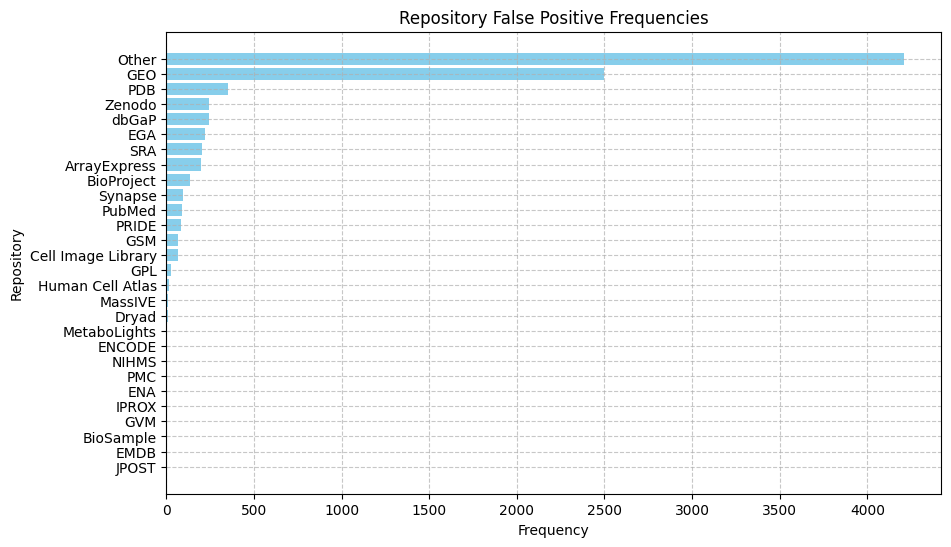

In [10]:
# Convert to DataFrame for display
repo_df = pd.DataFrame(list(repo_counts.items()), columns=['Repository', 'Frequency'])
repo_df.sort_values('Frequency', ascending=False, inplace=True)
# Display directly here# Plotting the frequencies
plt.figure(figsize=(10, 6))
plt.barh(repo_df['Repository'], repo_df['Frequency'], color='skyblue')
plt.xlabel('Frequency')
plt.ylabel('Repository')
plt.title('Repository False Positive Frequencies')
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

In [8]:
print(repo_df)

            Repository  Frequency
1                Other       4309
0                  GEO       2498
7                  PDB        350
3               Zenodo        243
2                dbGaP        241
9                  EGA        218
6                  SRA        204
5         ArrayExpress        196
12          BioProject        134
10              PubMed         88
13               PRIDE         86
19                 GSM         67
8   Cell Image Library         66
4                  GPL         26
15    Human Cell Atlas         12
14             MassIVE         11
16               Dryad         11
18        MetaboLights          5
23              ENCODE          5
11               NIHMS          4
17                 PMC          4
25                 ENA          3
20               IPROX          2
21                 GVM          1
22           BioSample          1
24                EMDB          1
26               JPOST          1


In [11]:
syn_missed_ids = []
for false_positive in false_positives:
    if re.match(repo_patterns['Synapse'], false_positive, re.IGNORECASE):
        syn_missed_ids.append(false_positive)
        print(f"Missed Synapse ID: {false_positive}")


Missed Synapse ID: syn51225253
Missed Synapse ID: syn51225257
Missed Synapse ID: syn51225260
Missed Synapse ID: syn26553019
Missed Synapse ID: syn10901606
Missed Synapse ID: syn3159438
Missed Synapse ID: syn2580853
Missed Synapse ID: syn10901594
Missed Synapse ID: syn3219018
Missed Synapse ID: syn26553018
Missed Synapse ID: syn3219045
Missed Synapse ID: syn2580853
Missed Synapse ID: syn18485175
Missed Synapse ID: syn53352733
Missed Synapse ID: syn21570779
Missed Synapse ID: syn2580853
Missed Synapse ID: syn27624812
Missed Synapse ID: syn3157293
Missed Synapse ID: syn5096262
Missed Synapse ID: syn23564903
Missed Synapse ID: syn7220556
Missed Synapse ID: syn2787215
Missed Synapse ID: syn64112114
Missed Synapse ID: syn11707420
Missed Synapse ID: syn4591741
Missed Synapse ID: syn4591754
Missed Synapse ID: syn4591895
Missed Synapse ID: syn4591707
Missed Synapse ID: syn4591887
Missed Synapse ID: syn4591737
Missed Synapse ID: syn4591889
Missed Synapse ID: syn4509334
Missed Synapse ID: syn4591

# Examples of Synapse IDs not spotted



### 1. `(synapse file ID syn:11707420)`

from `https://pmc.ncbi.nlm.nih.gov/articles/PMC11864243`



Data sources

The genomic variant data used in this study was obtained from the Accelerating Medicines Partnership - Alzheimer's Disease (AMP-AD) consortium. This dataset harmonizes whole-genome sequencing (WGS) data from three major Alzheimer's disease cohorts: the Religious Orders Study and Memory and Aging Project (ROSMAP), Mount Sinai Brain Bank (MSBB), and the Mayo RNA-seq (Mayo) study.35–38 The WGS data is available in VCF format from the Alzheimer's Disease Knowledge Portal (synapse file ID syn:11707420). Relevant covariate data, including diagnostic information and APOE genotypes, were sourced as CSV files for each cohort (MSBB: syn6101474, Mayo: syn23277389, ROSMAP: syn3191087).



### 2. `synapse.org/syn# 23564903`

from `https://pmc.ncbi.nlm.nih.gov/articles/PMC11602985/`

RNA-sequencing

The ROSMAP study provides RNA-Seq data from the dorsolateral prefrontal cortex (38). The Broad Institutes’ Genomics Platform performed RNA-Seq library preparation using the strand-specific dUTP method with poly-A selection (39). Sequencing was performed on the Illumina HiSeq. Quantile normalization method was applied to FPKM first and combat package was used to remove the potential batch effect. The ROS-MAP cortical RNA-Seq consolidated dataset is available directly from Research Resource Sharing Hub at https://www.radc.rush.edu/home.htm and at synapse.org/syn# 23564903. For APOB mRNA levels, we selected the full-length transcript ENST00000233242.